# players Saudi League Analysis
# Part 1: ***Data Acquisition and Exploring***

In [231]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

import re 
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Content:
## 0- Acquiring Data
## 1- Load Data
## 2- Clean Data
***cleaning tables***
- players standard stats
- players shooting
- Players playing time
- players miscellaneous stats
- player goalkeeping

***merging tables***


## 3- Save Data



===================================

## 0- ***Acquiring Data***

#### This data was collected from FBREF website for the season 2021.
[FBREF](https://fbref.com/en/comps/70/stats/Saudi-Professional-League-Stats)

## 1- ***Load Data***

In [232]:
st = pd.read_csv('Players Standard Stats.txt')
gk = pd.read_csv('player Goalkeeping.txt')
sh = pd.read_csv('player Shooting.txt')
pt = pd.read_csv('player Playing Time.txt')
ms = pd.read_csv('player Miscellaneous Stats.txt')

## 2- ***Clean Data***

### ***cleaning tables***

#### ***I) player stadard stats***

In [233]:
st.head(4)

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,year,-9999
0,1,Malek Al Abadalmanam,sa KSA,FW,Al-Fayha,23.0,1998.0,22,8,735,8.2,4,0,4,0,0,3,0,0.49,0.0,0.49,0.49,0.49,2021,22cccb9f
1,2,Saleh Al Abbas,sa KSA,MF,Al-Faisaly,27.0,1993.0,9,1,247,2.7,0,0,0,0,0,0,0,0.00,0.0,0.00,0.00,0.00,2021,ac46f44a
2,3,Hamad Al Abdan,sa KSA,MF,Al-Hazem,21.0,2000.0,8,3,298,3.3,0,0,0,0,0,0,0,0.00,0.0,0.00,0.00,0.00,2021,f64a8aee
3,4,Ayoub Abdellaoui,dz ALG,DF,Al-Ettifaq,28.0,1993.0,22,19,1598,17.8,0,0,0,0,0,4,0,0.00,0.0,0.00,0.00,0.00,2021,76250bac


In [234]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      3719 non-null   int64  
 1   Player  3719 non-null   object 
 2   Nation  3709 non-null   object 
 3   Pos     3717 non-null   object 
 4   Squad   3719 non-null   object 
 5   Age     3625 non-null   float64
 6   Born    3625 non-null   float64
 7   MP      3719 non-null   int64  
 8   Starts  3719 non-null   int64  
 9   Min     3719 non-null   int64  
 10  90s     3719 non-null   float64
 11  Gls     3719 non-null   int64  
 12  Ast     3719 non-null   int64  
 13  G-PK    3719 non-null   int64  
 14  PK      3719 non-null   int64  
 15  PKatt   3719 non-null   int64  
 16  CrdY    3719 non-null   int64  
 17  CrdR    3719 non-null   int64  
 18  Gls.1   3719 non-null   float64
 19  Ast.1   3719 non-null   float64
 20  G+A     3719 non-null   float64
 21  G-PK.1  3719 non-null   float64
 22  

Null values

In [235]:
# the Nan value in %
st.isna().sum(axis=0) / st.shape[0] * 100

Rk        0.000000
Player    0.000000
Nation    0.268889
Pos       0.053778
Squad     0.000000
Age       2.527561
Born      2.527561
MP        0.000000
Starts    0.000000
Min       0.000000
90s       0.000000
Gls       0.000000
Ast       0.000000
G-PK      0.000000
PK        0.000000
PKatt     0.000000
CrdY      0.000000
CrdR      0.000000
Gls.1     0.000000
Ast.1     0.000000
G+A       0.000000
G-PK.1    0.000000
G+A-PK    0.000000
year      0.000000
-9999     0.000000
dtype: float64

<AxesSubplot:>

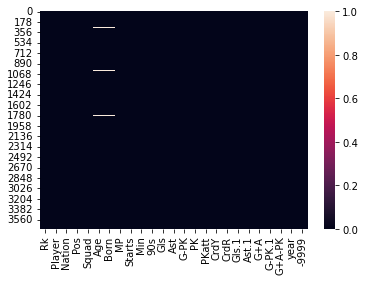

In [236]:
sns.heatmap(st.isna())

fillna & dropna

In [237]:
st.drop('-9999', axis=1, inplace=True)

In [238]:
st['Pos'].fillna('DF', inplace=True)
st['Nation'].fillna('sa KSA', inplace=True)
st['Age'].fillna(26.3, inplace=True)
st['Born'].fillna(1991.3, inplace=True)

{Age: 26.3  , Born: 1991.3}

<AxesSubplot:>

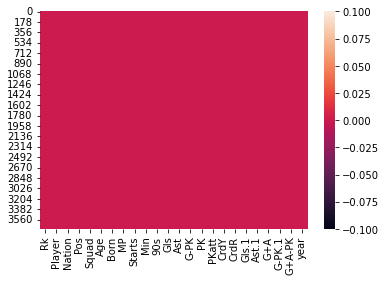

In [239]:
sns.heatmap(st.isna())

player 

In [240]:
st.Player = st.Player.apply(lambda x: x.replace('Al-','Al')
                                      .replace('Al ','Al')
                                      .replace('l-A','lA')
                                      .replace('El ', 'El'))

Nation

In [241]:
print(st['Nation'].nunique())
print()
print(st['Nation'].unique())

100

['sa KSA' 'dz ALG' 'cm CMR' 'ao ANG' 'gh GHA' 'jo JOR' 'ma MAR' 'mk MKD'
 'br BRA' 'fr FRA' 'bi BDI' 'pt POR' 'hr CRO' 'ar ARG' 'tn TUN' 'au AUS'
 'uy URU' 'pe PER' 'co COL' 'ml MLI' 'nl NED' 'eg EGY' 'rs SRB' 'mw MWI'
 'ng NGA' 'es ESP' 'kr KOR' 'py PAR' 'sk SVK' 'ua UKR' 'cl CHI' 'cv CPV'
 'bg BUL' 'md MDA' 'cd COD' 'ch SUI' 'uz UZB' 'cg CGO' 'ne NIG' 'zw ZIM'
 'sn SEN' 'gr GRE' 'se SWE' 'sy SYR' 'sr SUR' 'no NOR' 'de GER' 'mg MAD'
 'lt LTU' 'ro ROU' 'mr MTN' 'it ITA' 'tt TRI' 've VEN' 'ee EST' 'kz KAZ'
 'me MNE' 'ba BIH' 'bj BEN' 'SUD' 'td CHA' 'ga GAB' 'cw CUW' 'ci CIV'
 'tr TUR' 'pl POL' 'dk DEN' 'cf CTA' 'gw GNB' 'ae UAE' 'bo BOL' 'kw KUW'
 'gn GUI' 'ec ECU' 'be BEL' 'om OMA' 'cr CRC' 'by BLR' 'gm GAM' 'ge GEO'
 'km COM' 'iq IRQ' 'ly LBY' 'hn HON' 'lr LBR' 'sl SLE' 'am ARM' 'zm ZAM'
 'th THA' 'tl TLS' 'bf BFA' 'st STP' 'tg TOG' 'gq EQG' 'bh BHR' 'ps PLE'
 'pr PUR' 'za RSA' 'ke KEN' 'lb LIB']


In [242]:
# Keep the 3 letters country code and remove whitespaces
st['Nation'] = st.Nation.apply(lambda x: x.split()[-1].strip())

pos

In [243]:
st.Pos.unique()

array(['FW', 'MF', 'DF', 'GK', 'MFFW', 'FWMF', 'MFDF', 'DFMF', 'DFFW',
       'GKMF'], dtype=object)

In [244]:
# Keep the first postion only (for simplicity)
st.Pos = st.Pos.apply(lambda x: x[0])


In [245]:
st.Pos.unique()

array(['F', 'M', 'D', 'G'], dtype=object)

In [246]:
st.Pos.value_counts().sum()

3719

In [247]:
st.head(3)

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,year
0,1,Malek AlAbadalmanam,KSA,F,Al-Fayha,23.0,1998.0,22,8,735,8.2,4,0,4,0,0,3,0,0.49,0.0,0.49,0.49,0.49,2021
1,2,Saleh AlAbbas,KSA,M,Al-Faisaly,27.0,1993.0,9,1,247,2.7,0,0,0,0,0,0,0,0.00,0.0,0.00,0.00,0.00,2021
2,3,Hamad AlAbdan,KSA,M,Al-Hazem,21.0,2000.0,8,3,298,3.3,0,0,0,0,0,0,0,0.00,0.0,0.00,0.00,0.00,2021


create 2 tables

In [248]:
st18 = st[st.year >= 2018].iloc[:,:-1]
st18.tail()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK
1986,506,Safi AlZaqarta,KSA,F,Al-Ahli,19.0,1999.0,2,0,19,0.2,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
1987,507,Omar AlZayni,KSA,M,Al-Ahli,22.0,1996.0,1,0,1,0.0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
1988,508,Abdullah AlZori,KSA,D,Al-Wehda,30.0,1987.0,22,22,1968,21.9,1,0,1,0,0,1,0,0.05,0.00,0.05,0.05,0.05
1989,509,Ibrahim AlZubaidi,KSA,D,Al-Taawoun,29.0,1989.0,27,26,2285,25.4,1,4,1,0,0,7,0,0.04,0.16,0.20,0.04,0.20
1990,510,Mohammed AlZubaidi,KSA,M,Al-Ahli,20.0,1997.0,3,2,86,1.0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00


In [249]:
st14 = st.iloc[:,:-1].reset_index()
st14.tail()

,index,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK
3714,3714,421,Ibrahim AlZawahreh,JOR,D,Al-Khaleej,25.0,1989.0,24,24,2069,23.0,5,1,4,1,1,5,1,0.22,0.04,0.26,0.17,0.22
3715,3715,422,Khaled AlZealaiy,KSA,M,Al-Nassr,27.0,1987.0,1,0,20,0.2,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
3716,3716,423,Abdullah AlZori,KSA,D,Al-Hilal,26.0,1987.0,19,15,1267,14.1,1,0,1,0,0,1,1,0.07,0.00,0.07,0.07,0.07
3717,3717,424,Ali AlZubaidi,KSA,D,Al-Orobah,21.0,1993.0,11,6,548,6.1,0,0,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00
3718,3718,425,Đorđe Đikanović,MNE,D,Hajer,29.0,1984.0,23,23,2028,22.5,0,1,0,0,0,6,1,0.00,0.04,0.04,0.00,0.04


#### ***II) player shooting***

In [250]:
sh.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,PK,PKatt,year,-9999
0,1,Malek Al Abadalmanam,sa KSA,FW,Al-Fayha,23.0,1998.0,8.2,4,24,13,54.2,2.94,1.59,0.17,0.31,NaN,0,0,2021,22cccb9f
1,2,Saleh Al Abbas,sa KSA,MF,Al-Faisaly,27.0,1993.0,2.7,0,6,1,16.7,2.19,0.36,0.00,0.00,NaN,0,0,2021,ac46f44a
2,3,Hamad Al Abdan,sa KSA,MF,Al-Hazem,21.0,2000.0,3.3,0,6,2,33.3,1.81,0.60,0.00,0.00,NaN,0,0,2021,f64a8aee
3,4,Ayoub Abdellaoui,dz ALG,DF,Al-Ettifaq,28.0,1993.0,17.8,0,11,4,36.4,0.62,0.23,0.00,0.00,NaN,0,0,2021,76250bac
4,5,Saud Abdulhamid,sa KSA,DF,Al-Hilal,22.0,1999.0,10.8,0,3,0,0.0,0.28,0.00,0.00,NaN,NaN,0,0,2021,caa254e4


In [251]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      1991 non-null   int64  
 1   Player  1991 non-null   object 
 2   Nation  1981 non-null   object 
 3   Pos     1990 non-null   object 
 4   Squad   1991 non-null   object 
 5   Age     1918 non-null   float64
 6   Born    1918 non-null   float64
 7   90s     1991 non-null   float64
 8   Gls     1991 non-null   int64  
 9   Sh      1991 non-null   int64  
 10  SoT     1991 non-null   int64  
 11  SoT%    1565 non-null   float64
 12  Sh/90   1991 non-null   float64
 13  SoT/90  1991 non-null   float64
 14  G/Sh    1565 non-null   float64
 15  G/SoT   1241 non-null   float64
 16  Dist    0 non-null      float64
 17  PK      1991 non-null   int64  
 18  PKatt   1991 non-null   int64  
 19  year    1991 non-null   int64  
 20  -9999   1991 non-null   object 
dtypes: float64(9), int64(7), object(5)
me

In [252]:
# the Nan value in %
sh.isna().sum(axis=0) / sh.shape[0] * 100

Rk          0.000000
Player      0.000000
Nation      0.502260
Pos         0.050226
Squad       0.000000
Age         3.666499
Born        3.666499
90s         0.000000
Gls         0.000000
Sh          0.000000
SoT         0.000000
SoT%       21.396283
Sh/90       0.000000
SoT/90      0.000000
G/Sh       21.396283
G/SoT      37.669513
Dist      100.000000
PK          0.000000
PKatt       0.000000
year        0.000000
-9999       0.000000
dtype: float64

<AxesSubplot:>

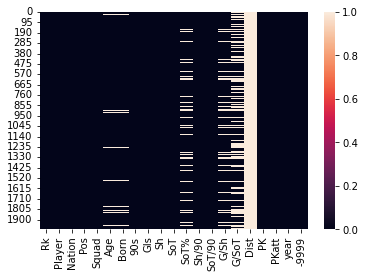

In [253]:
sns.heatmap(sh.isna())

fillna & dropna

In [254]:
sh.drop(['Dist', '-9999'], axis=1, inplace=True)

In [255]:
sh['Pos'].fillna('DF', inplace=True)
sh['Nation'].fillna('sa KSA', inplace=True)
sh['Age'].fillna(26.3, inplace=True)
sh['Born'].fillna(1991.3, inplace=True)

In [256]:
sh['G/Sh'] = sh['G/Sh'].fillna(0)
sh['SoT%'] = sh['SoT%'].fillna(0)
sh['G/SoT'] = sh['G/SoT'].fillna(0)

<AxesSubplot:>

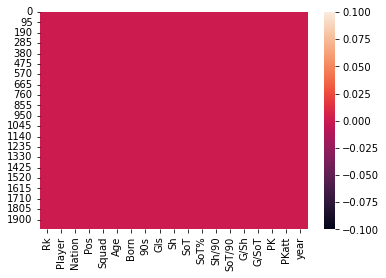

In [257]:
sns.heatmap(sh.isna())

In [258]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      1991 non-null   int64  
 1   Player  1991 non-null   object 
 2   Nation  1991 non-null   object 
 3   Pos     1991 non-null   object 
 4   Squad   1991 non-null   object 
 5   Age     1991 non-null   float64
 6   Born    1991 non-null   float64
 7   90s     1991 non-null   float64
 8   Gls     1991 non-null   int64  
 9   Sh      1991 non-null   int64  
 10  SoT     1991 non-null   int64  
 11  SoT%    1991 non-null   float64
 12  Sh/90   1991 non-null   float64
 13  SoT/90  1991 non-null   float64
 14  G/Sh    1991 non-null   float64
 15  G/SoT   1991 non-null   float64
 16  PK      1991 non-null   int64  
 17  PKatt   1991 non-null   int64  
 18  year    1991 non-null   int64  
dtypes: float64(8), int64(7), object(4)
memory usage: 295.7+ KB


In [259]:
sh18 = sh.iloc[:,7:-1]
sh18.shape

(1991, 11)

#### ***III) players playing time***

In [260]:
pt.head(3)

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Min,Mn/MP,Min%,90s,Starts,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,year,-9999
0,1,Malek Al Abadalmanam,sa KSA,FW,Al-Fayha,23.0,1998.0,22,735.0,33.0,27.2,8.2,8,68.0,2.0,14,14.0,2,1.32,7.0,4.0,3.0,0.37,0.64,2021,22cccb9f
1,2,Saleh Al Abbas,sa KSA,MF,Al-Faisaly,27.0,1993.0,9,247.0,27.0,9.1,2.7,1,55.0,0.0,8,24.0,12,0.22,2.0,5.0,-3.0,-1.09,-0.87,2021,ac46f44a
2,3,Hamad Al Abdan,sa KSA,MF,Al-Hazem,21.0,2000.0,8,298.0,37.0,11.0,3.3,3,67.0,0.0,5,19.0,2,1.00,1.0,5.0,-4.0,-1.21,-0.35,2021,f64a8aee


In [261]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rk        4240 non-null   int64  
 1   Player    4240 non-null   object 
 2   Nation    4208 non-null   object 
 3   Pos       4235 non-null   object 
 4   Squad     4240 non-null   object 
 5   Age       4085 non-null   float64
 6   Born      4085 non-null   float64
 7   MP        4240 non-null   int64  
 8   Min       3719 non-null   float64
 9   Mn/MP     3719 non-null   float64
 10  Min%      3720 non-null   float64
 11  90s       3720 non-null   float64
 12  Starts    4240 non-null   int64  
 13  Mn/Start  3310 non-null   float64
 14  Compl     4171 non-null   float64
 15  Subs      4240 non-null   int64  
 16  Mn/Sub    2714 non-null   float64
 17  unSub     4240 non-null   int64  
 18  PPM       3720 non-null   float64
 19  onG       3720 non-null   float64
 20  onGA      3720 non-null   floa

Null values

In [262]:
# the Nan value in %
pt.isna().sum(axis=0) / pt.shape[0] * 100

Rk           0.000000
Player       0.000000
Nation       0.754717
Pos          0.117925
Squad        0.000000
Age          3.655660
Born         3.655660
MP           0.000000
Min         12.287736
Mn/MP       12.287736
Min%        12.264151
90s         12.264151
Starts       0.000000
Mn/Start    21.933962
Compl        1.627358
Subs         0.000000
Mn/Sub      35.990566
unSub        0.000000
PPM         12.264151
onG         12.264151
onGA        12.264151
+/-         12.264151
+/-90       12.287736
On-Off      12.641509
year         0.000000
-9999        0.000000
dtype: float64

dropna & fillna

In [263]:
pt['Pos'].fillna('DF', inplace=True)
pt['Nation'].fillna('sa KSA', inplace=True)
pt['Age'].fillna(26.3, inplace=True)
pt['Born'].fillna(1991.3, inplace=True)

In [264]:
pt['Mn/Sub'] = pt['Mn/Sub'].fillna(0)
pt['Mn/Start'] = pt['Mn/Start'].fillna(0)
pt['Compl'] = pt['Compl'].fillna(0)
pt['On-Off'] = pt['On-Off'].fillna(0)

In [265]:
pt.dropna(subset= ['Min'], axis=0, inplace=True)
pt.shape

(3719, 26)

In [266]:
pt[pt.year >= 2018].reset_index().shape

(1991, 27)

In [267]:
pt18 = pt[pt.year >= 2018].reset_index().iloc[:, 7:-2]
pt18.tail()

,Born,MP,Min,Mn/MP,Min%,90s,Starts,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off
1986,1999.0,2,19.0,10.0,0.7,0.2,0,0.0,0.0,2,9.0,0,1.50,1.0,1.0,0.0,0.00,-0.91
1987,1996.0,1,1.0,1.0,0.0,0.0,0,0.0,0.0,1,0.0,12,3.00,0.0,0.0,0.0,0.00,-0.90
1988,1987.0,22,1968.0,89.0,72.9,21.9,22,89.0,21.0,0,0.0,2,1.41,26.0,27.0,-1.0,-0.05,-0.17
1989,1989.0,27,2285.0,85.0,84.6,25.4,26,86.0,19.0,1,45.0,0,1.85,47.0,27.0,20.0,0.79,-1.38
1990,1997.0,3,86.0,29.0,3.2,1.0,2,33.0,0.0,1,21.0,8,1.00,2.0,3.0,-1.0,-1.05,-2.01


In [268]:
pt14 = pt.iloc[:, 7:-1].reset_index()
pt14.head(2)

,index,MP,Min,Mn/MP,Min%,90s,Starts,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,year
0,0,22,735.0,33.0,27.2,8.2,8,68.0,2.0,14,14.0,2,1.32,7.0,4.0,3.0,0.37,0.64,2021
1,1,9,247.0,27.0,9.1,2.7,1,55.0,0.0,8,24.0,12,0.22,2.0,5.0,-3.0,-1.09,-0.87,2021


#### ***III) player miscellaneous stats***

In [269]:
ms.sample(4)

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG,year,-9999
214,215,Ahmed Hegazi,eg EGY,DF,Al-Ittihad,30.0,1991.0,18.0,1,0,0,3,12,3,14,5,7,NaN,NaN,0,2021,5540c9dc
1895,415,Hamdan Al Ruwaili,sa KSA,DF,Al-Taawoun,23.0,1995.0,5.0,0,0,0,10,20,0,17,16,6,2.0,0.0,0,2018,c06ecb42
735,220,Kim Jin-su,kr KOR,DF,Al-Nassr,28.0,1992.0,6.6,2,0,0,13,11,1,26,12,7,NaN,NaN,0,2020,8e6ff136
1435,450,Somália,br BRA,MFDF,Al-Shabab,30.0,1988.0,6.0,0,0,0,4,10,1,10,7,4,0.0,0.0,0,2019,c1febb46


In [270]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      1991 non-null   int64  
 1   Player  1991 non-null   object 
 2   Nation  1981 non-null   object 
 3   Pos     1990 non-null   object 
 4   Squad   1991 non-null   object 
 5   Age     1918 non-null   float64
 6   Born    1918 non-null   float64
 7   90s     1991 non-null   float64
 8   CrdY    1991 non-null   int64  
 9   CrdR    1991 non-null   int64  
 10  2CrdY   1991 non-null   int64  
 11  Fls     1991 non-null   int64  
 12  Fld     1991 non-null   int64  
 13  Off     1991 non-null   int64  
 14  Crs     1991 non-null   int64  
 15  Int     1991 non-null   int64  
 16  TklW    1991 non-null   int64  
 17  PKwon   833 non-null    float64
 18  PKcon   833 non-null    float64
 19  OG      1991 non-null   int64  
 20  year    1991 non-null   int64  
 21  -9999   1991 non-null   object 
dtype

In [271]:
ms.drop(['-9999','PKwon','PKcon'], axis=1, inplace=True)

In [272]:
ms['Pos'].fillna('DF', inplace=True)
ms['Nation'].fillna('sa KSA', inplace=True)
ms['Age'].fillna(26.3, inplace=True)
ms['Born'].fillna(1991.3, inplace=True)

In [273]:
ms18 = ms.iloc[:,11:19]
ms18.head(3)

,Fls,Fld,Off,Crs,Int,TklW,OG,year
0,27,12,3,1,1,1,0,2021
1,5,7,1,1,1,1,0,2021
2,3,0,0,2,1,2,0,2021


#### ***II) players goalkeeping***

In [274]:
gk.sample(5)

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%.1,year,-9999
87,14,Ahmed Al-Kassar,sa KSA,GK,Al-Faisaly,28.0,1991.0,3,3,180,2.0,4.0,2.00,5.0,3,60.0,0.0,1.0,1.0,0,0.0,2,2,0,0,0.0,2019,eedb42fd
141,30,Abdullah Al-Owaishir,sa KSA,GK,Ohod,27.0,1991.0,6,6,540,6.0,13.0,2.17,39.0,26,66.7,0.0,3.0,3.0,2,33.3,0,0,0,0,NaN,2018,6a1fe279
36,37,Vladimir Stojković,rs SRB,GK,Al-Fayha,38.0,1983.0,29,29,2610,29.0,21.0,0.72,112.0,94,83.0,8.0,11.0,10.0,13,44.8,4,2,2,0,50.0,2021,c089980e
140,29,Abdullah Al-Owaishir,sa KSA,GK,Al-Nassr,27.0,1991.0,1,0,45,0.5,2.0,4.00,3.0,2,66.7,0.0,0.0,0.0,0,NaN,1,1,0,0,0.0,2018,6a1fe279
47,8,Cássio,pt POR,GK,Al-Taawoun,39.0,1980.0,28,28,2520,28.0,28.0,1.00,112.0,91,81.3,13.0,7.0,8.0,11,39.3,9,7,1,1,12.5,2020,5d3888a5


In [275]:
gk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       283 non-null    int64  
 1   Player   283 non-null    object 
 2   Nation   283 non-null    object 
 3   Pos      283 non-null    object 
 4   Squad    283 non-null    object 
 5   Age      278 non-null    float64
 6   Born     278 non-null    float64
 7   MP       283 non-null    int64  
 8   Starts   283 non-null    int64  
 9   Min      283 non-null    int64  
 10  90s      283 non-null    float64
 11  GA       181 non-null    float64
 12  GA90     181 non-null    float64
 13  SoTA     154 non-null    float64
 14  Saves    283 non-null    int64  
 15  Save%    151 non-null    float64
 16  W        281 non-null    float64
 17  D        281 non-null    float64
 18  L        281 non-null    float64
 19  CS       283 non-null    int64  
 20  CS%      276 non-null    float64
 21  PKatt    283 non

<AxesSubplot:>

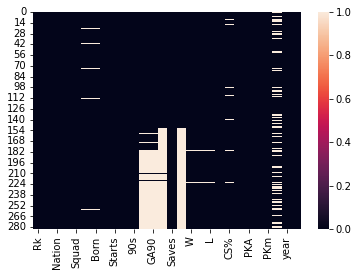

In [276]:
sns.heatmap(gk.isna())

In [277]:
# the Nan value in %
gk.isna().sum(axis=0) / gk.shape[0] * 100

Rk          0.000000
Player      0.000000
Nation      0.000000
Pos         0.000000
Squad       0.000000
Age         1.766784
Born        1.766784
MP          0.000000
Starts      0.000000
Min         0.000000
90s         0.000000
GA         36.042403
GA90       36.042403
SoTA       45.583039
Saves       0.000000
Save%      46.643110
W           0.706714
D           0.706714
L           0.706714
CS          0.000000
CS%         2.473498
PKatt       0.000000
PKA         0.000000
PKsv        0.000000
PKm         0.000000
Save%.1    27.915194
year        0.000000
-9999       0.000000
dtype: float64

dropna & fillna

In [278]:
gk.drop('-9999', axis=1, inplace=True)

In [279]:
gk['Age'].fillna(gk['Age'].mean() , inplace=True)
gk['Born'].fillna(gk['Born'].mean(), inplace=True)

In [280]:
gk['GA'].fillna(18.3 , inplace=True)
gk['GA90'].fillna(1.3 , inplace=True)
gk['SoTA'].fillna(51.3 , inplace=True)
gk['Save%'].fillna(69.3 , inplace=True)
gk['W'].fillna(4.3 , inplace=True)
gk['D'].fillna(2.3 , inplace=True)
gk['L'].fillna(4.3 , inplace=True)
gk['CS%'].fillna(18.3 , inplace=True)
gk['CS%'].fillna(22.3 , inplace=True)
gk['Save%.1'].fillna(13.3 , inplace=True)

player

In [281]:
gk.Player = gk.Player.apply(lambda x: x.replace('Al-','Al')
                                      .replace('Al ','Al')
                                      .replace('l-A','lA')
                                      .replace('El ', 'El'))

Nation

In [282]:
# Keep the 3 letters country code and remove whitespaces
gk['Nation'] = gk.Nation.apply(lambda x: x.split()[-1].strip())

pos

In [283]:
gk['Pos'].unique()

array(['GK', 'MF'], dtype=object)

In [284]:
# Keep the first postion only (for simplicity)
gk.Pos = gk.Pos.apply(lambda x: x.split(',')[0])

In [285]:
gk.head(3)

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%.1,year
0,1,Waleed Abdullah,KSA,GK,Al-Nassr,35.0,1986.0,20,19,1649,18.3,20.0,1.09,52.0,37,71.2,13.0,1.0,5.0,6,31.6,6,5,0,1,0.0,2021
1,2,Nawaf AlAqidi,KSA,GK,Al-Ta'ee,21.0,2000.0,7,7,630,7.0,5.0,0.71,25.0,20,80.0,5.0,1.0,1.0,3,42.9,0,0,0,0,13.3,2021
2,3,Nawaf AlAqidi,KSA,GK,Al-Nassr,21.0,2000.0,3,3,270,3.0,4.0,1.33,8.0,5,62.5,1.0,1.0,1.0,0,0.0,1,1,0,0,0.0,2021


### ***Merging tables***

In [286]:
pt18.tail()

,Born,MP,Min,Mn/MP,Min%,90s,Starts,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off
1986,1999.0,2,19.0,10.0,0.7,0.2,0,0.0,0.0,2,9.0,0,1.50,1.0,1.0,0.0,0.00,-0.91
1987,1996.0,1,1.0,1.0,0.0,0.0,0,0.0,0.0,1,0.0,12,3.00,0.0,0.0,0.0,0.00,-0.90
1988,1987.0,22,1968.0,89.0,72.9,21.9,22,89.0,21.0,0,0.0,2,1.41,26.0,27.0,-1.0,-0.05,-0.17
1989,1989.0,27,2285.0,85.0,84.6,25.4,26,86.0,19.0,1,45.0,0,1.85,47.0,27.0,20.0,0.79,-1.38
1990,1997.0,3,86.0,29.0,3.2,1.0,2,33.0,0.0,1,21.0,8,1.00,2.0,3.0,-1.0,-1.05,-2.01


In [287]:
ps18 = pd.concat((st18,sh18,pt18,ms18), axis=1).reset_index()

In [288]:
ps18.head()

,index,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,PK,PKatt,Born,MP,Min,Mn/MP,Min%,90s,Starts,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,Fls,Fld,Off,Crs,Int,TklW,OG,year
0,0,1,Malek AlAbadalmanam,KSA,F,Al-Fayha,23.0,1998.0,22,8,735,8.2,4,0,4,0,0,3,0,0.49,0.00,0.49,0.49,0.49,8.2,4,24,13,54.2,2.94,1.59,0.17,0.31,0,0,1998.0,22,735.0,33.0,27.2,8.2,8,68.0,2.0,14,14.0,2,1.32,7.0,4.0,3.0,0.37,0.64,27,12,3,1,1,1,0,2021
1,1,2,Saleh AlAbbas,KSA,M,Al-Faisaly,27.0,1993.0,9,1,247,2.7,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,2.7,0,6,1,16.7,2.19,0.36,0.00,0.00,0,0,1993.0,9,247.0,27.0,9.1,2.7,1,55.0,0.0,8,24.0,12,0.22,2.0,5.0,-3.0,-1.09,-0.87,5,7,1,1,1,1,0,2021
2,2,3,Hamad AlAbdan,KSA,M,Al-Hazem,21.0,2000.0,8,3,298,3.3,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,3.3,0,6,2,33.3,1.81,0.60,0.00,0.00,0,0,2000.0,8,298.0,37.0,11.0,3.3,3,67.0,0.0,5,19.0,2,1.00,1.0,5.0,-4.0,-1.21,-0.35,3,0,0,2,1,2,0,2021
3,3,4,Ayoub Abdellaoui,ALG,D,Al-Ettifaq,28.0,1993.0,22,19,1598,17.8,0,0,0,0,0,4,0,0.00,0.00,0.00,0.00,0.00,17.8,0,11,4,36.4,0.62,0.23,0.00,0.00,0,0,1993.0,22,1598.0,73.0,59.2,17.8,19,82.0,14.0,3,13.0,0,0.95,19.0,25.0,-6.0,-0.34,-0.26,23,20,1,22,21,11,0,2021
4,4,5,Saud Abdulhamid,KSA,D,Al-Hilal,22.0,1999.0,13,10,970,10.8,0,2,0,0,0,2,0,0.00,0.19,0.19,0.00,0.19,10.8,0,3,0,0.0,0.28,0.00,0.00,0.00,0,0,1999.0,13,970.0,75.0,35.9,10.8,10,88.0,9.0,3,31.0,0,2.77,29.0,6.0,23.0,2.13,1.51,20,15,0,43,7,24,0,2021


In [289]:
ps18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 61 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1991 non-null   int64  
 1   Rk        1991 non-null   int64  
 2   Player    1991 non-null   object 
 3   Nation    1991 non-null   object 
 4   Pos       1991 non-null   object 
 5   Squad     1991 non-null   object 
 6   Age       1991 non-null   float64
 7   Born      1991 non-null   float64
 8   MP        1991 non-null   int64  
 9   Starts    1991 non-null   int64  
 10  Min       1991 non-null   int64  
 11  90s       1991 non-null   float64
 12  Gls       1991 non-null   int64  
 13  Ast       1991 non-null   int64  
 14  G-PK      1991 non-null   int64  
 15  PK        1991 non-null   int64  
 16  PKatt     1991 non-null   int64  
 17  CrdY      1991 non-null   int64  
 18  CrdR      1991 non-null   int64  
 19  Gls.1     1991 non-null   float64
 20  Ast.1     1991 non-null   floa

In [290]:
pt14.shape

(3719, 19)

In [291]:
st14.shape

(3719, 24)

In [292]:
st14.tail()

,index,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK
3714,3714,421,Ibrahim AlZawahreh,JOR,D,Al-Khaleej,25.0,1989.0,24,24,2069,23.0,5,1,4,1,1,5,1,0.22,0.04,0.26,0.17,0.22
3715,3715,422,Khaled AlZealaiy,KSA,M,Al-Nassr,27.0,1987.0,1,0,20,0.2,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
3716,3716,423,Abdullah AlZori,KSA,D,Al-Hilal,26.0,1987.0,19,15,1267,14.1,1,0,1,0,0,1,1,0.07,0.00,0.07,0.07,0.07
3717,3717,424,Ali AlZubaidi,KSA,D,Al-Orobah,21.0,1993.0,11,6,548,6.1,0,0,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00
3718,3718,425,Đorđe Đikanović,MNE,D,Hajer,29.0,1984.0,23,23,2028,22.5,0,1,0,0,0,6,1,0.00,0.04,0.04,0.00,0.04


In [293]:
pt14.tail()

,index,MP,Min,Mn/MP,Min%,90s,Starts,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,year
3714,4234,24,2069.0,86.0,88.4,23.0,24,86.0,22.0,0,0.0,0,1.08,28.0,34.0,-6.0,-0.26,-0.26,2014
3715,4235,1,20.0,20.0,0.9,0.2,0,0.0,0.0,1,19.0,3,3.00,0.0,0.0,0.0,0.00,-1.63,2014
3716,4236,19,1267.0,67.0,54.1,14.1,15,79.0,8.0,4,20.0,1,2.11,20.0,11.0,9.0,0.64,-1.04,2014
3717,4237,11,548.0,50.0,23.4,6.1,6,83.0,5.0,5,10.0,13,0.91,3.0,9.0,-6.0,-0.99,-0.18,2014
3718,4239,23,2028.0,88.0,86.7,22.5,23,88.0,21.0,0,0.0,0,1.09,26.0,47.0,-21.0,-0.93,0.80,2014


In [294]:
ps14 = pd.concat((st14,pt14), axis=1)
ps14.tail(3)

,index,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,index,MP,Min,Mn/MP,Min%,90s,Starts,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,year
3716,3716,423,Abdullah AlZori,KSA,D,Al-Hilal,26.0,1987.0,19,15,1267,14.1,1,0,1,0,0,1,1,0.07,0.00,0.07,0.07,0.07,4236,19,1267.0,67.0,54.1,14.1,15,79.0,8.0,4,20.0,1,2.11,20.0,11.0,9.0,0.64,-1.04,2014
3717,3717,424,Ali AlZubaidi,KSA,D,Al-Orobah,21.0,1993.0,11,6,548,6.1,0,0,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00,4237,11,548.0,50.0,23.4,6.1,6,83.0,5.0,5,10.0,13,0.91,3.0,9.0,-6.0,-0.99,-0.18,2014
3718,3718,425,Đorđe Đikanović,MNE,D,Hajer,29.0,1984.0,23,23,2028,22.5,0,1,0,0,0,6,1,0.00,0.04,0.04,0.00,0.04,4239,23,2028.0,88.0,86.7,22.5,23,88.0,21.0,0,0.0,0,1.09,26.0,47.0,-21.0,-0.93,0.80,2014


In [295]:
ps14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     3719 non-null   int64  
 1   Rk        3719 non-null   int64  
 2   Player    3719 non-null   object 
 3   Nation    3719 non-null   object 
 4   Pos       3719 non-null   object 
 5   Squad     3719 non-null   object 
 6   Age       3719 non-null   float64
 7   Born      3719 non-null   float64
 8   MP        3719 non-null   int64  
 9   Starts    3719 non-null   int64  
 10  Min       3719 non-null   int64  
 11  90s       3719 non-null   float64
 12  Gls       3719 non-null   int64  
 13  Ast       3719 non-null   int64  
 14  G-PK      3719 non-null   int64  
 15  PK        3719 non-null   int64  
 16  PKatt     3719 non-null   int64  
 17  CrdY      3719 non-null   int64  
 18  CrdR      3719 non-null   int64  
 19  Gls.1     3719 non-null   float64
 20  Ast.1     3719 non-null   floa

##  3- ***Save data***

##### ***ls 18-14***

In [296]:
ps18.to_csv('p_period 18-21', index=False)

In [297]:
ps14.to_csv('p_period 14-21', index=False)

In [298]:
gk.to_csv('goolkeepars', index=False)